In [2]:
#imports
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None 

In [3]:
# importing graphs
hospital_df = pd.read_csv("hosp_data.csv")
crime_df = pd.read_csv("crime_data.csv")

In [4]:
# Enum for converting state abrv to full name
# https://gist.github.com/rogerallen/1583593

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}

abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
us_state_list = list (us_state_to_abbrev.values())

 # Operation Find Top-Rated Hospitals (OFTRH)

 ### Abstract

Finding quality healthcare is important. The goal of this project is to provide patients with listings of top- rated hospitals near them, so they are provided with timely and quality care. With this information, another goal of this project is to attempt to explain reasoning for the such hospital ratings by comparing crime rates in the same areas. We hypothesize areas with higher crime rates will have lower funded hospitals and will therefore have lower hospital ratings and areas with lower crime rates will have better funded hospitals and therefore higher quality hospital ratings. To accomplish this, we will use the Hospital General Information data set available at this [site](https://data.cms.gov/provider-data/topics/hospitals) and extract the hospital ratings data for each state. The data provides key information on hospitals in the US including their name, state, rating and type of hospital ownership (government, proprietary, voluntary (non-profit), etc.). To determine the correlation(s) between hospital ratings and crime rates we will use the crime rate dataset from this [site](https://worldpopulationreview.com/state-rankings/crime-rate-by-state).

### Significance of Data Analysis

The analysis of this data will allow individuals to find the top-rated hospital in their state. With this information individuals can find comfort in knowing that the hospital they select to recieve care from is going to supply them with top-rated care, and it will allow them to avoid low-rating hospitals in their state.

<h3>How the overall hospital rating is decided.</h3>
<p>This rating summarizes a variety of measures across 5 areas of quality into a single star rating for each hospital.</p>
<p>The 5 measure groups and their weight used in calculation are as follows:
    <ul>
        <li>Mortality: 22%</li>
        <li>Safety: 22%</li>
        <li>Readmission: 22%</li>
        <li>Patient Experience: 22%</li>
        <li>Timely & Effective Care: 12%</li>
    </ul>
</p>

| Overall Rating | Percentage of Hospitals |
| :-------- | :------- |
| 1 star | 6.34% |
| 2 star | 22.49% |
| 3 star | 28.68% |
| 4 star | 28.68% |
| 5 star | 13.81% |

### Project Literature
- Areas that have lower crime rates have less deaths by crimes, which means lower mortality rates at hospitals which in turn give hospitals higher ratings.
- Areas with higher crime rates equates to more individuals from crimes being treated in hopsitals which in turn can make patients not feel as safe or not have as good of an experience which gives hospitals lower ratings.
- Areas with higher rates of crime have to spend more money on situations pertaining to violence and therefore have less fu



 ### Hypothesis
    
We hypothesize areas with higher crime rates will have lower funded hospitals and will therefore have lower hospital ratings and areas with lower crime rates will have better funded hospitals and therefore higher quality hospital ratings.

 ### Process
 
 We will have to extract the hospital data organized by state then find correlations between the organized data and the crime rates by state. 
 

In [5]:
# Takes in state input as abbr (WI, IL, etc)
def getOverallRatingsByStateAbbr(state_abbr):
    stateHospitals = hospital_df[hospital_df["State"] == state_abbr]
    # Drop `Not Available` then replace them with the mean of the dataset without `Not Available`
    cleanedHospitalRating = stateHospitals["Hospital overall rating"].replace("Not Available", np.nan).dropna().astype("int64")
    return stateHospitals["Hospital overall rating"].replace("Not Available", cleanedHospitalRating.mean()).astype("int64")

# Get all hospitals by the state
def getHospitalsByStateAbbr(state_abbr):
    return hospital_df[hospital_df["State"] == state_abbr]

# Get all of the crime rates by state
def getCrimeRateByStateAbbr(state_abbr):
    return crime_df[crime_df["state"] == abbrev_to_us_state[state_abbr]]

# Get the top rated hospital by state
def getTopRatedHospitalByStateAbbr(state_abbr):
    hospitals = getHospitalsByStateAbbr(state_abbr)
    hospitals.loc[:,"Hospital overall rating"] = hospitals["Hospital overall rating"].replace("Not Available", "0").astype("int64")
    sorted = hospitals.sort_values(by=["Hospital overall rating"], ascending=False)
    
    return sorted.iloc[0]

# Get total number of hospitals by state
def getNumberOfHospitalsByStateAbbr(state_abbr):
    return len(getHospitalsByStateAbbr(state_abbr))

ownerships = {}
# Type of hospital ownership by ratings
for ind in hospital_df.index:
    if hospital_df["Hospital Ownership"][ind] in ownerships:
        ownerships[hospital_df["Hospital Ownership"][ind]] = ownerships[hospital_df["Hospital Ownership"][ind]] + 1
    else:
        ownerships[hospital_df["Hospital Ownership"][ind]] = 1
    
print(ownerships)


# {'Government - Hospital District or Authority': 524,
#  'Proprietary': 1057,
#  'Voluntary non-profit - Private': 2254,
#  'Government - State': 204, 
#  'Voluntary non-profit - Other': 380,
#  'Government - Local': 424,
#  'Voluntary non-profit - Church': 299,
#  'Government - Federal': 46,
#  'Tribal': 10, 
#  'Department of Defense': 35,
#  'Physician': 74}

In [6]:
getOverallRatingsByStateAbbr('IL').mean()

3.163157894736842

In [7]:
getCrimeRateByStateAbbr("IL")['rate'].sum()

3544.667

### Correlation 
Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect

In [8]:
# for state in us_state_list:
#     print (state)

In [9]:
# get all state hospital ratings (mean) and crime rates and create a dataframe

states = []
hospital_ratings = []
crime_rates = []

for state in us_state_list:
    # add state to states array
    states.append(state)
    # add hospital rating to hospital_ratings array
    hospital_ratings.append(getOverallRatingsByStateAbbr(state).mean())
    # add crime rate to crime rates array
    crime_rates.append(getCrimeRateByStateAbbr(state)['rate'].sum())
    
df = pd.DataFrame({ "states": states, "hospital_ratings": hospital_ratings, "crime_rates": crime_rates })
print(df)

   states  hospital_ratings  crime_rates
0      AL          3.010204     4727.065
1      AK          2.240000     5358.896
2      AZ          2.510000     4940.118
3      AR          2.511628     5898.753
4      CA          3.005376     4719.900
5      CO          3.451613     6090.756
6      CT          3.305556     3311.746
7      DE          3.000000     4354.642
8      FL          2.682692     3922.458
9      GA          2.523810     4414.802
10     HI          4.040000     5076.880
11     ID          3.340426     2466.346
12     IL          3.163158     3544.667
13     IN          3.232877     3924.039
14     IA          3.264957     3699.976
15     KS          3.108696     4823.212
16     KY          2.594059     3818.102
17     LA          3.025316     6408.216
18     ME          3.243243     2420.932
19     MD          2.672727     3619.488
20     MA          3.329114     2415.177
21     MI          3.300699     3199.772
22     MN          3.308824     4527.250
23     MS       

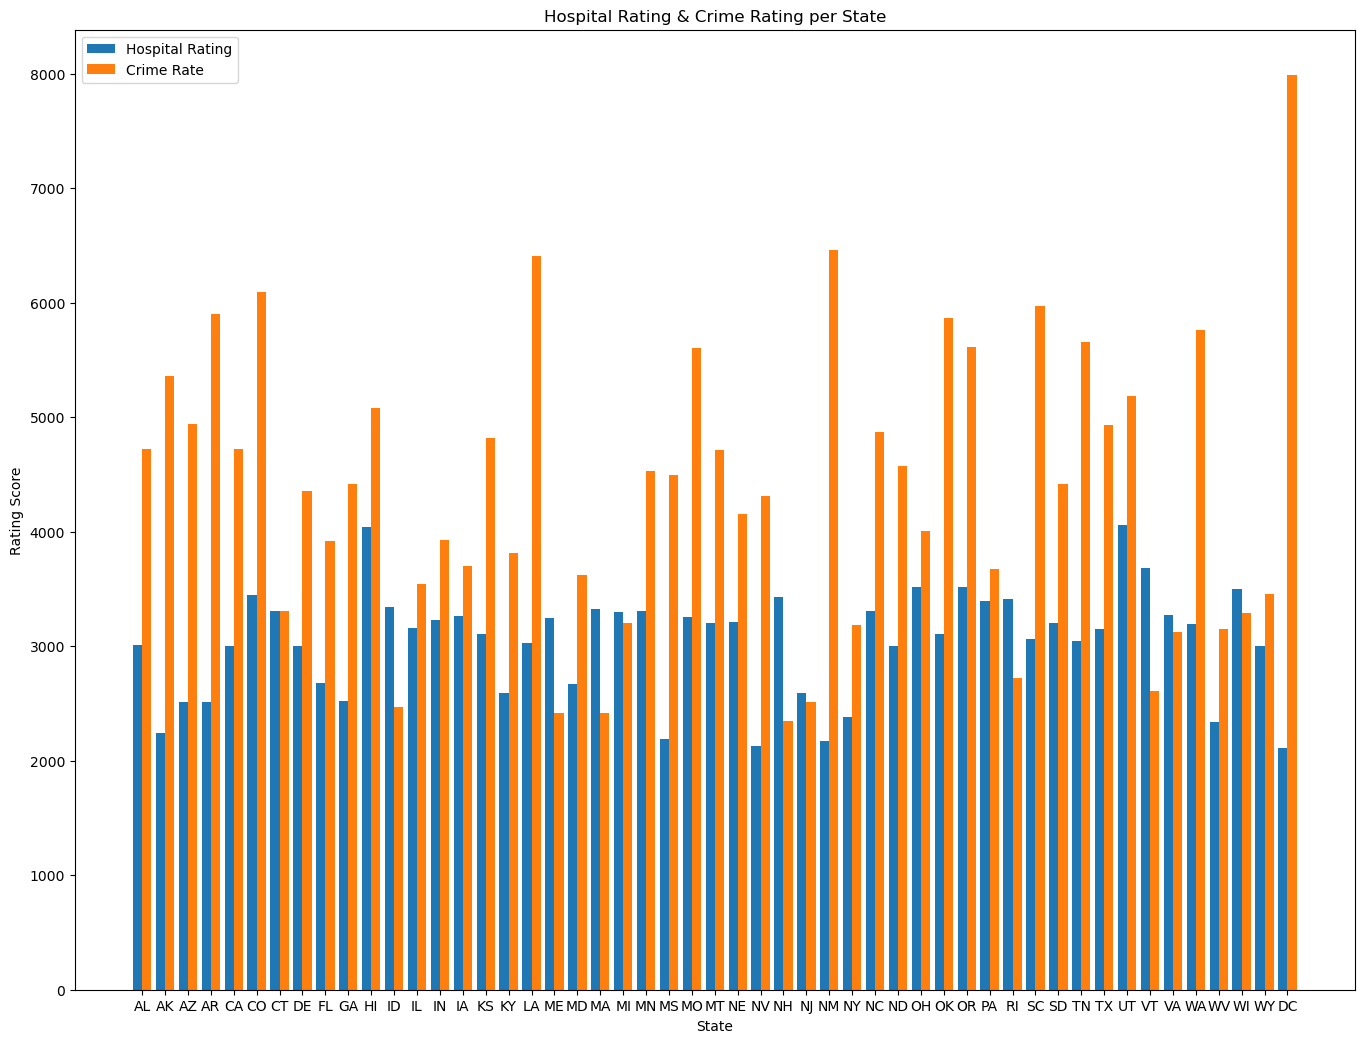

In [12]:
# Make bargraph
X_axis = np.arange(len(df.states))
fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2])
ax.bar(X_axis -0.2, df['hospital_ratings'].values*1000, 0.4, label="Hospital Rating")
ax.bar(X_axis +0.2, df['crime_rates'].values, 0.4, label="Crime Rate")
plt.xticks(X_axis, df['states'].values)
plt.xlabel("State")
plt.ylabel("Rating Score")
plt.title("Hospital Rating & Crime Rating per State")
plt.legend()
plt.show()

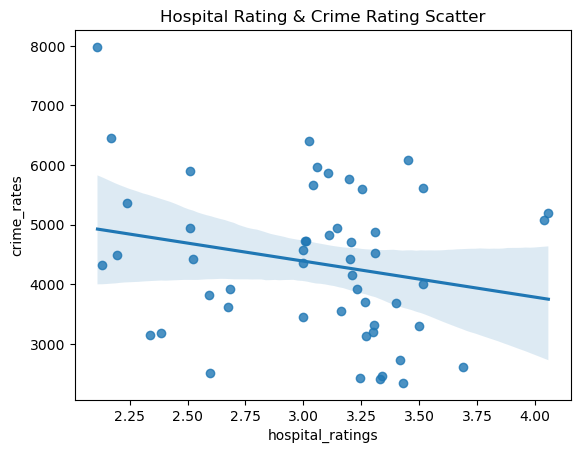

In [14]:
#Cooler Scatterplot
plt.xlabel('Hospital Rating')
plt.ylabel('Crime Rate')
plt.title("Hospital Rating & Crime Rating Scatter")
plt.show(sns.regplot(x='hospital_ratings', y='crime_rates', data = df))